In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
from soma import aims

In [10]:
### run on example 10 subjects 
controls = pd.read_csv('../../DerivedData/control_group_list.csv', header=None)#[:20]
preterms = pd.read_csv('../../DerivedData/preterm_group_list.csv', header=None)#[:20]

In [11]:
np.arange(0,5.2,0.5)/100

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 ])

In [12]:
cleaning_range = np.arange(0,10.2,0.5)/100

cleaning_check = {}
for threshold in [0.05]:#cleaning_range:
    print(threshold)
    thresholds_control = {}
    for i, row in controls.iterrows():
        iDir = '/neurospin/grip/external_databases/dHCP_CR_JD_2018/release3/dhcp_dmri_shard_pipeline/sub-{}/ses-{}/dwi/probtrakX_results'.format(
                    row[0], row[1])
    
        folders = [folder for folder in os.listdir(iDir) if 'ROIbyROI' in folder]
        for folder in folders:
            label = folder.split('2x2_')[-1]
            label = label.split('Mask')
            label = label[0] + label[1] 
            label = label.replace('sh', '')
            #print(label)
        
            iVol = aims.read(os.path.join(iDir, folder, 'fdt_paths.nii.gz'))
            im = iVol.arraydata()[0]
        
            if label in thresholds_control.keys():
                thresholds_control[label].append(np.round(np.max(im.ravel())*threshold,2))
            else:
                thresholds_control[label] = [np.round(np.max(im.ravel())*threshold,2)]
                
            #if (label == 'S1L-S1R') and (np.round(np.max(im.ravel())*threshold,2)<5):
            #    print(row[0], np.round(np.max(im.ravel())*threshold,2))
    
    for key in thresholds_control.keys():
        check = np.array(thresholds_control[key]).astype(np.float)[np.array(thresholds_control[key]).astype(np.float) <1]
        
        if key in cleaning_check.keys():
            cleaning_check[key].append(len(check)*100/len(controls))
            
        else:
            cleaning_check[key] = [len(check)*100/len(controls)]
         


0.05
('CC00616XX14', 0.75)
('CC00498XX21', 2.6)
('CC00594XX18', 0.65)
('CC00402XX06', 0.15)
('CC00409XX13', 2.3)
('CC00178XX14', 0.65)
('CC00149XX18', 2.8)


In [65]:
cleaning_range

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ])

In [67]:

for key in cleaning_check.keys():
    
    ar = np.array(cleaning_check[key]).astype(np.float)
    
    if len(ar[ar==0]) < (len(cleaning_range)-1):
        print(key, len(ar[ar==0]), cleaning_range[-len(ar[ar==0])]*100)

('S1L-S1R', 7, 7.000000000000001)
('ParacentralR-SubthalR', 17, 2.0)
('ParacentralL-SubthalL', 18, 1.5)
('M1L-M1R', 14, 3.5000000000000004)


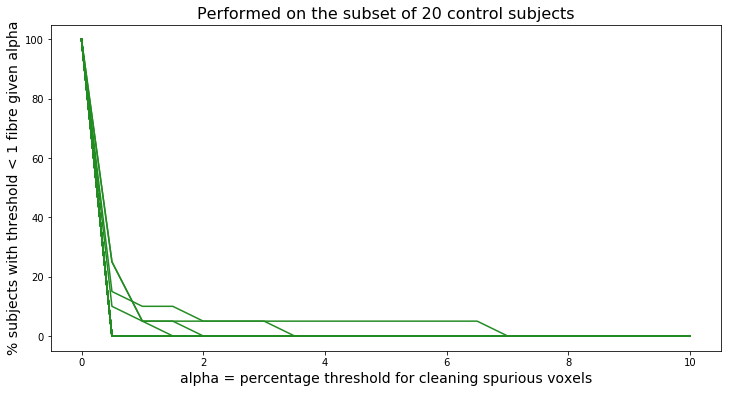

In [57]:
plt.figure(figsize=(12,6))
for key in cleaning_check.keys():
    plt.plot(cleaning_range*100, cleaning_check[key], c='forestgreen', label=key)

#plt.legend()
plt.ylabel('% subjects with threshold < 1 fibre given alpha', fontsize=14)
plt.xlabel('alpha = percentage threshold for cleaning spurious voxels', fontsize=14)
plt.title('Performed on the subset of {} control subjects'.format(len(controls)), fontsize=16)
plt.show()

In [ ]:
plt.hist(im.ravel(), bins=np.arange(0.01,2000,50))
plt.show()

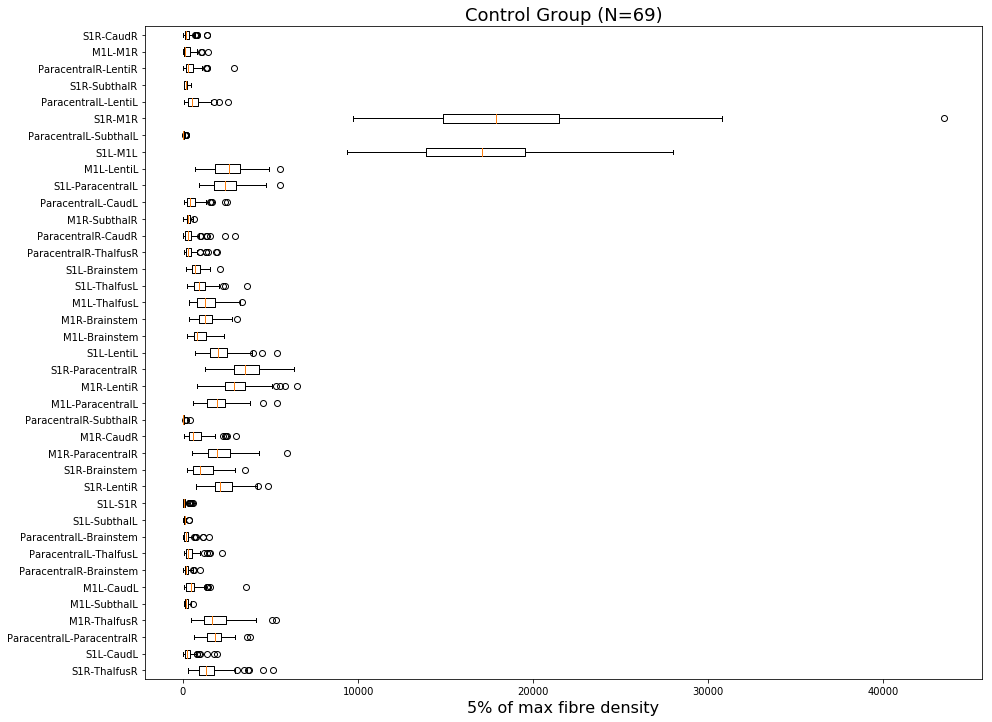

In [65]:
plt.figure(figsize=(15,12))
plt.boxplot(thresholds.values(), labels=thresholds.keys(), vert=False )
plt.title('Control Group (N={})'.format(len(thresholds['M1L-Brainstem'])), fontsize=18)
plt.xlabel('5% of max fibre density', fontsize=16)
plt.show()

In [67]:
thresholds = {}
for i, row in preterms.iterrows():
    iDir = '/neurospin/grip/external_databases/dHCP_CR_JD_2018/release3/dhcp_dmri_shard_pipeline/sub-{}/ses-{}/dwi/probtrakX_results'.format(
                    row[0], row[1])
    
    if os.path.isdir(iDir):
    
        folders = [folder for folder in os.listdir(iDir) if 'ROIbyROI' in folder]
        for folder in folders:
            label = folder.split('2x2_')[-1]
            label = label.split('Mask')
            label = label[0] + label[1] 
            label = label.replace('sh', '')
            #print(label)
        
            iVol = aims.read(os.path.join(iDir, folder, 'fdt_paths.nii.gz'))
            im = iVol.arraydata()[0]
        
            if label in thresholds.keys():
                thresholds[label].append(np.round(np.max(im.ravel())*0.05,2))
            else:
                thresholds[label] = [np.round(np.max(im.ravel())*0.05,2)]
        

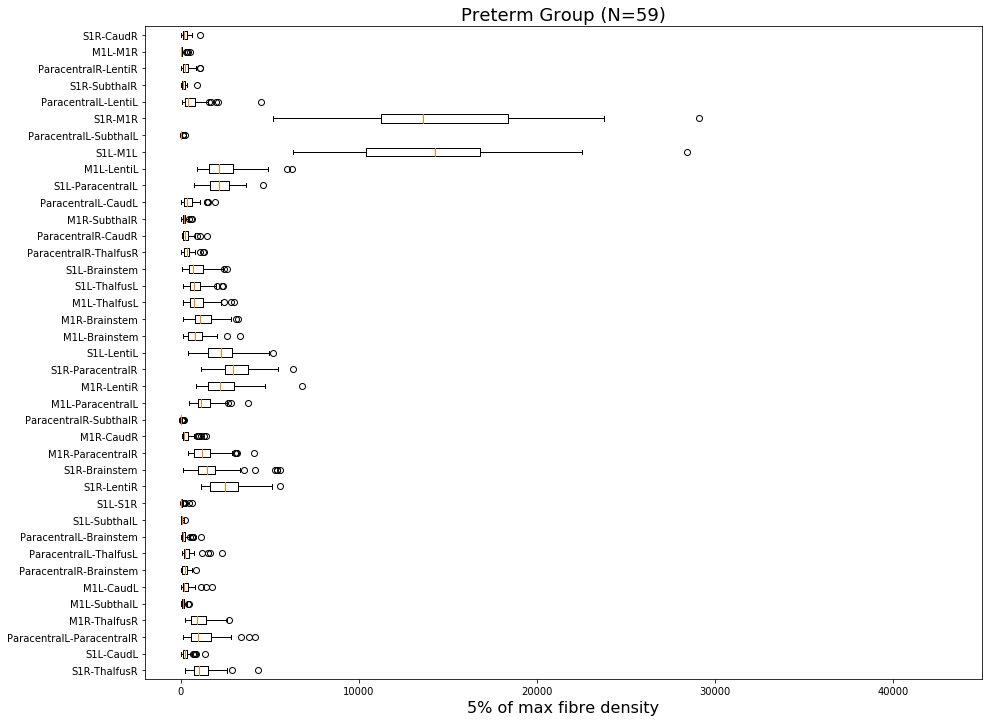

In [75]:
plt.figure(figsize=(15,12))
plt.boxplot(thresholds.values(), labels=thresholds.keys(), vert=False )
plt.title('Preterm Group (N={})'.format(len(thresholds['M1L-Brainstem'])), fontsize=18)
plt.xlabel('5% of max fibre density', fontsize=16)
plt.xlim(-2000,45000)
plt.show()

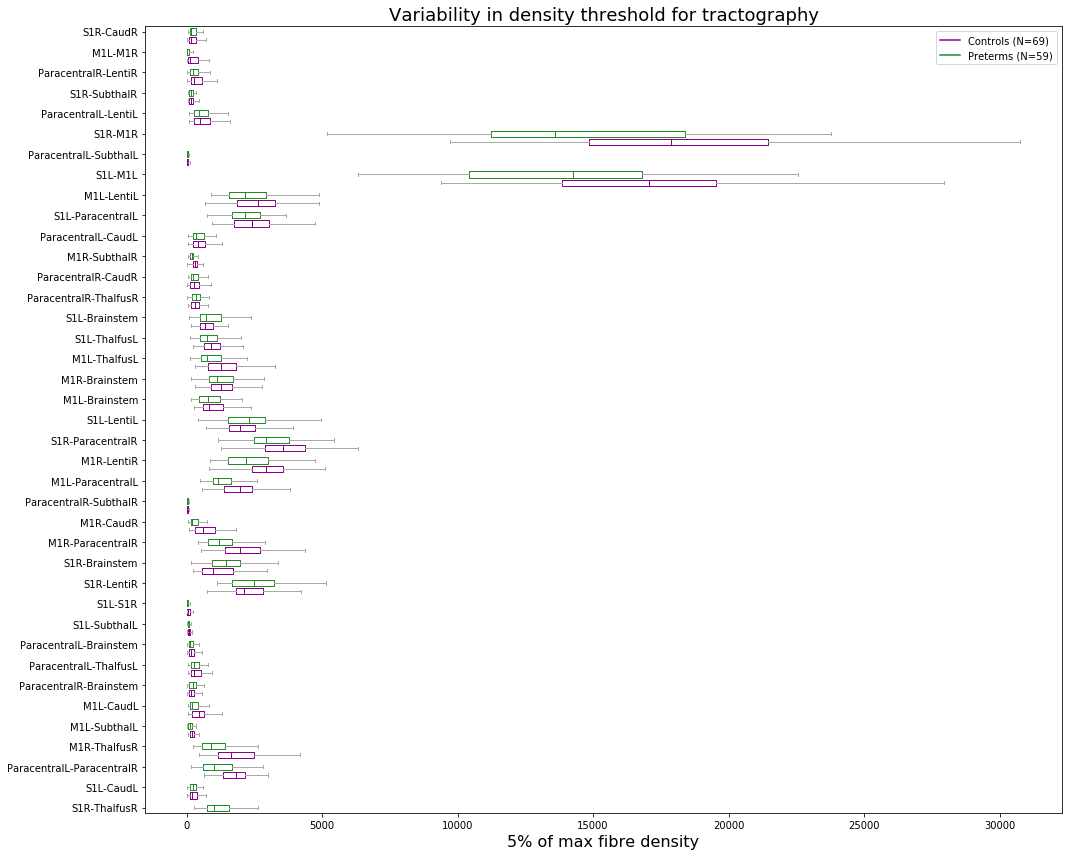

In [93]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='darkgray')
    plt.setp(bp['caps'], color='darkgray')
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(15,12))
bpl = plt.boxplot(thresholds_control.values(), positions=np.array(xrange(len(thresholds_control.values())))*2.0-0.4, sym='', widths=0.6, vert=False, labels=thresholds_control.keys())
bpr = plt.boxplot(thresholds.values(), positions=np.array(xrange(len(thresholds.values())))*2.0+0.4, sym='', widths=0.6, vert=False, labels=thresholds.keys())

set_box_color(bpl, 'darkmagenta') # colors are from http://colorbrewer2.org/
set_box_color(bpr, 'forestgreen')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='darkmagenta', label='Controls (N={})'.format(len(thresholds_control['M1L-Brainstem'])))
plt.plot([], c='forestgreen', label='Preterms (N={})'.format(len(thresholds['M1L-Brainstem'])))
plt.legend()

plt.title('Variability in density threshold for tractography', fontsize=18)
plt.xlabel('5% of max fibre density', fontsize=16)

plt.tight_layout()
plt.show()